## Assignment 8.2
Author: Rex Gayas
Date: 04 February 2024
Modified By: N/A
Description: Creating visualizations using Seaborn and Matplotlib to analyze and annotate data trends, such as stock price movements and COVID-19 case progression.

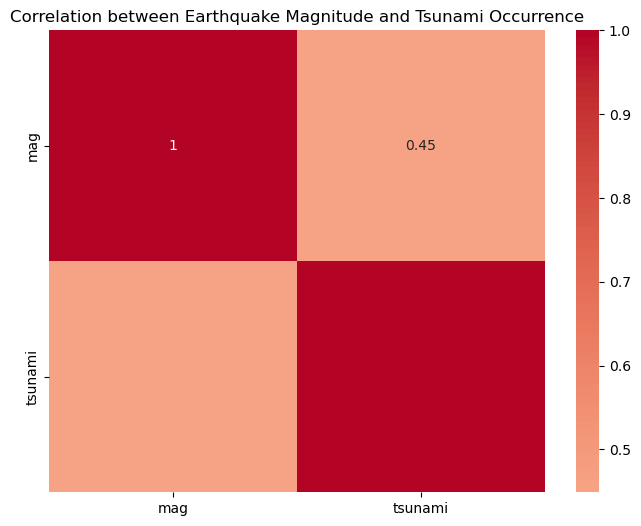

In [35]:
# Solution to Exercise 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data 
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 8\\earthquakes.csv"
earthquake_data = pd.read_csv(data_path)

# Filter for mb magnitude type using the 'magType' column
mb_earthquakes = earthquake_data[earthquake_data['magType'] == 'mb']

# Select relevant columns 'mag' for magnitude and 'tsunami'
relevant_data = mb_earthquakes[['mag', 'tsunami']]

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Earthquake Magnitude and Tsunami Occurrence')
plt.show()


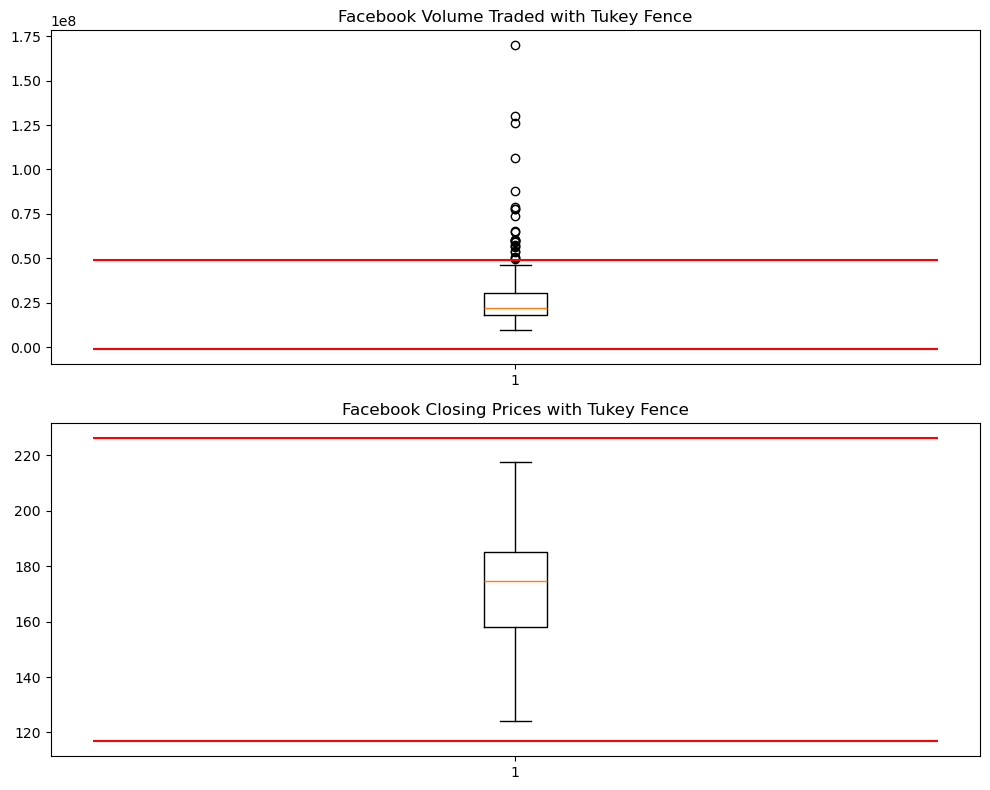

In [36]:
# Solution to Exercise 2

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 8\\fb_stock_prices_2018.csv"
fb_data = pd.read_csv(data_path)

# Calculate Q1, Q3, and IQR for 'volume'
Q1_volume = fb_data['volume'].quantile(0.25)
Q3_volume = fb_data['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume

# Calculate Q1, Q3, and IQR for 'close'
Q1_close = fb_data['close'].quantile(0.25)
Q3_close = fb_data['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Volume Traded Boxplot
ax[0].boxplot(fb_data['volume'])
ax[0].hlines([Q1_volume - 1.5 * IQR_volume, Q3_volume + 1.5 * IQR_volume], xmin=0, xmax=2, color='r')
ax[0].set_title('Facebook Volume Traded with Tukey Fence')

# Closing Prices Boxplot
ax[1].boxplot(fb_data['close'])
ax[1].hlines([Q1_close - 1.5 * IQR_close, Q3_close + 1.5 * IQR_close], xmin=0, xmax=2, color='r')
ax[1].set_title('Facebook Closing Prices with Tukey Fence')

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\RexAr\AppData\Local\Temp\ipykernel_16492\249351853.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_data['dateRep'] = pd.to_datetime(covid_data['dateRep'])


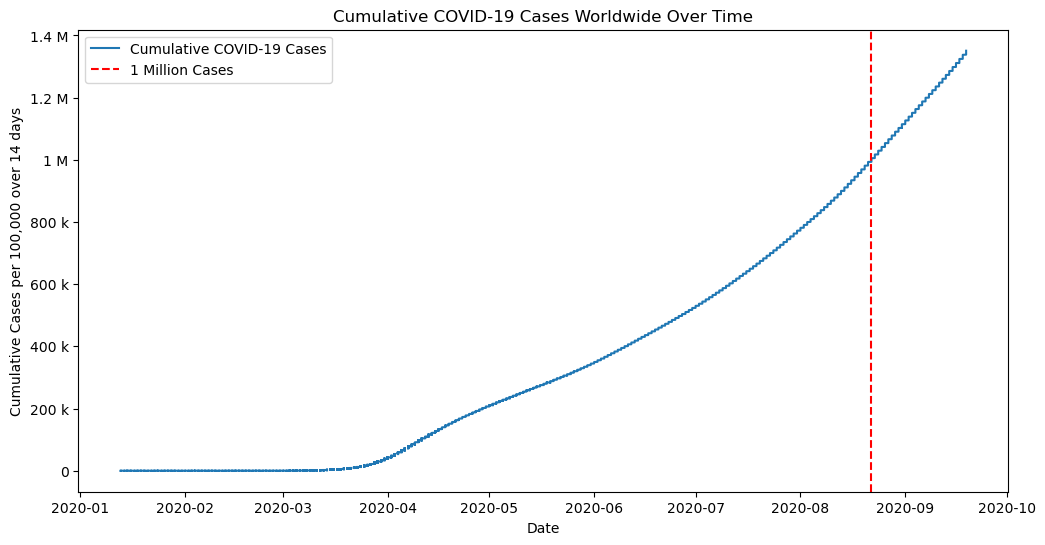

In [37]:
# Solution to Exercise 3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 8\\covid19_cases.csv"
covid_data = pd.read_csv(data_path)

# Convert 'dateRep' to datetime format and sort the data
covid_data['dateRep'] = pd.to_datetime(covid_data['dateRep'])
covid_data = covid_data.sort_values('dateRep')

# Cumulative number of cases in column'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
cumulative_cases = covid_data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].cumsum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(covid_data['dateRep'], cumulative_cases, label='Cumulative COVID-19 Cases')

# Find the date when cumulative cases surpassed 1 million
million_cases_date = covid_data[covid_data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].cumsum() >= 1e6]['dateRep'].iloc[0]

# Add a dashed vertical line on the date
plt.axvline(x=million_cases_date, color='r', linestyle='--', label='1 Million Cases')

# Format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Cases per 100,000 over 14 days')
plt.title('Cumulative COVID-19 Cases Worldwide Over Time')
plt.legend()

# Show the plot
plt.show()



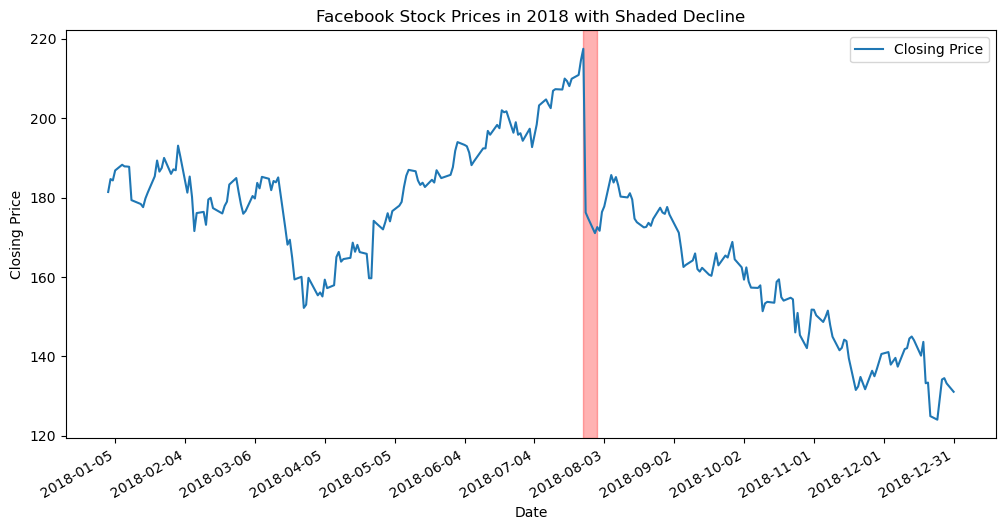

In [38]:
# Solution to Exercise 4
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 8\\fb_stock_prices_2018.csv"
fb_data = pd.read_csv(data_path)

# Ensure the date column is in datetime format
fb_data['date'] = pd.to_datetime(fb_data['date'])

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(fb_data['date'], fb_data['close'], label='Closing Price')

# Shade the period of large decline
plt.axvspan(mdates.date2num(pd.to_datetime('2018-07-25')), 
            mdates.date2num(pd.to_datetime('2018-07-31')), 
            color='red', alpha=0.3)

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 
plt.gcf().autofmt_xdate() 

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Stock Prices in 2018 with Shaded Decline')
plt.legend()

# Show the plot
plt.show()


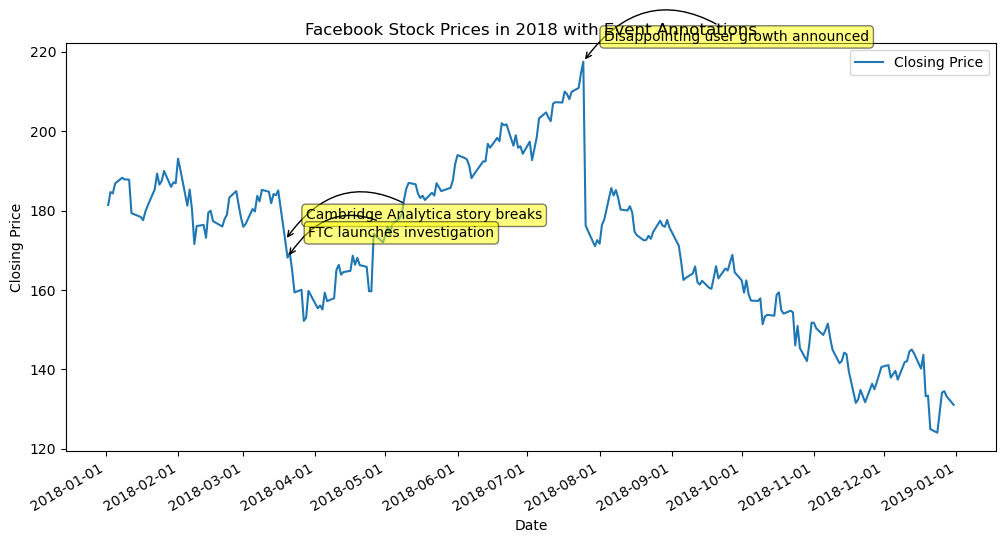

In [39]:
# Solution to Exercise 5
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Winter 2023\\Data Wrangling\\Week 8\\fb_stock_prices_2018.csv"
fb_data = pd.read_csv(data_path)

# Check date column is in datetime format
fb_data['date'] = pd.to_datetime(fb_data['date'])

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(fb_data['date'], fb_data['close'], label='Closing Price')

# Annotate the events
events = {
    'Disappointing user growth announced': '2018-07-25',
    'Cambridge Analytica story breaks': '2018-03-19',
    'FTC launches investigation': '2018-03-20'
}

for event, date in events.items():
    event_date = pd.to_datetime(date)
    closing_price_on_event = fb_data.loc[fb_data['date'] == event_date, 'close'].values[0]
    plt.annotate(event, 
                 (mdates.date2num(event_date), closing_price_on_event),
                 xytext=(15, 15), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow', alpha=0.5))

# Format the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() 

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Stock Prices in 2018 with Event Annotations')
plt.legend()

# Show the plot
plt.show()


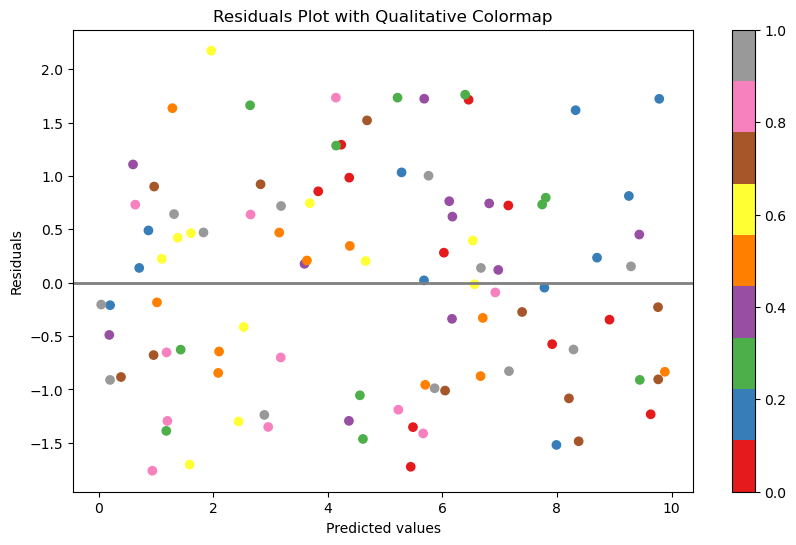

In [40]:
# Solution to Exercise 6
import matplotlib.pyplot as plt
import numpy as np

# Example regression model
class ExampleModel:
    def fit(self, x, y):
        self.coefficient = np.polyfit(x, y, 1)
        return self
    
    def predict(self, x):
        return np.poly1d(self.coefficient)(x)

# Sample function to create regression residual plots
def reg_resid_plots(x, y):
    model = ExampleModel().fit(x, y)
    predictions = model.predict(x)
    residuals = y - predictions
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, residuals, c=np.linspace(0, 1, len(residuals)), cmap='Set1')  # Using a colormap
    plt.axhline(0, color='grey', linewidth=2)  # Add a horizontal line at 0 for reference
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot with Qualitative Colormap')
    plt.colorbar()  # Show color scale
    plt.show()

# Generate sample data
np.random.seed(0)
x_example = np.random.rand(100) * 10
y_example = 2.5 * x_example + np.random.randn(100)

# Use the sample function with the generated data
reg_resid_plots(x_example, y_example)

